In [1]:
import numpy as np
import scipy as sc 
import mne
import os 
import os.path

In [2]:
montage = mne.channels.read_montage('biosemi256')
raw = mne.io.read_raw_edf("eeg_recording_1.bdf", preload=True)
#raw.info['ch_names'] = [x[1:] for x in  raw.info['ch_names'][0:255]]

Extracting edf Parameters from eeg_recording_1.bdf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 1260287  =      0.000 ...  4922.996 secs...
Ready.


In [64]:
raw = raw.filter(1,59)

Setting up band-pass filter from 1 - 59 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 14.8 Hz
Filter length of 1690 samples (6.602 sec) selected


In [65]:
picks = mne.pick_channels(raw.info['ch_names'],['1C8', '1C30'])  #AF7 and AF8 on a BioSemi

In [66]:
n_components = 2  # if float, select n_components by explained variance of PCA
method = 'fastica'  # for comparison with EEGLAB try "extended-infomax" here
decim = 3  # we need sufficient statistics, not all time points -> saves time
ica = mne.preprocessing.ICA(n_components=n_components, method=method)

In [67]:
events = mne.find_events(raw, stim_channel = 'STI 014', min_duration = 0.01 )

Removing orphaned offset at the beginning of the file.
55 events found
Events id: [ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 30]


In [68]:
event_id = {"happy": 13, "sad": 14, "fear": 16, "disgust": 23}
tmin = -1  # start of each epoch (1s before the trigger)
tmax = 40  # end of each epoch (20s after the trigger)
baseline = (None, 0)  # means from the first instant to t = 0
epochs = {}
epochs_raw = {}
for event in event_id:
    epochs[event] = mne.Epochs(raw, events, event_id[event], tmin, tmax, baseline=baseline, picks = picks, preload=True)
    epochs_raw[event] = mne.Epochs(raw, events, event_id[event], tmin, tmax, baseline=baseline, preload=True)
    

1 matching events found
0 projection items activated
Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
1 matching events found
0 projection items activated
Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
1 matching events found
0 projection items activated
Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
1 matching events found
0 projection items activated
Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
1 matching events found
0 projection items activated
Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
1 matching events found
0 projection items activated
Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
1 matching events found
0 projection items activated
Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
1 matching events found
0 projection items activated
Lo

In [69]:
ica_soln = {}
for event in epochs:
    ica_soln[event] = ica.fit(epochs_raw[event])

Fitting ICA to data using 264 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by number: 2 components
Fitting ICA to data using 264 channels. 
Please be patient, this may take some time
Selection by number: 2 components
Fitting ICA to data using 264 channels. 
Please be patient, this may take some time
Selection by number: 2 components
Fitting ICA to data using 264 channels. 
Please be patient, this may take some time
Selection by number: 2 components


In [63]:
np.dot((epochs['happy'].get_data()[0,:,:]), ica_soln['happy'].unmixing_matrix_ )

ValueError: shapes (2,10497) and (2,2) not aligned: 10497 (dim 1) != 2 (dim 0)

In [70]:
import scipy.io as sio

for event in epochs:
    sio.savemat(event+"_ica.mat", {"data": np.dot(ica_soln[event].unmixing_matrix_ ,(epochs[event].get_data()[0,:,:])) })

Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
Loading data for 1 events and 10497 original time points ...
Loading data for 1 events and 10497 original time points ...


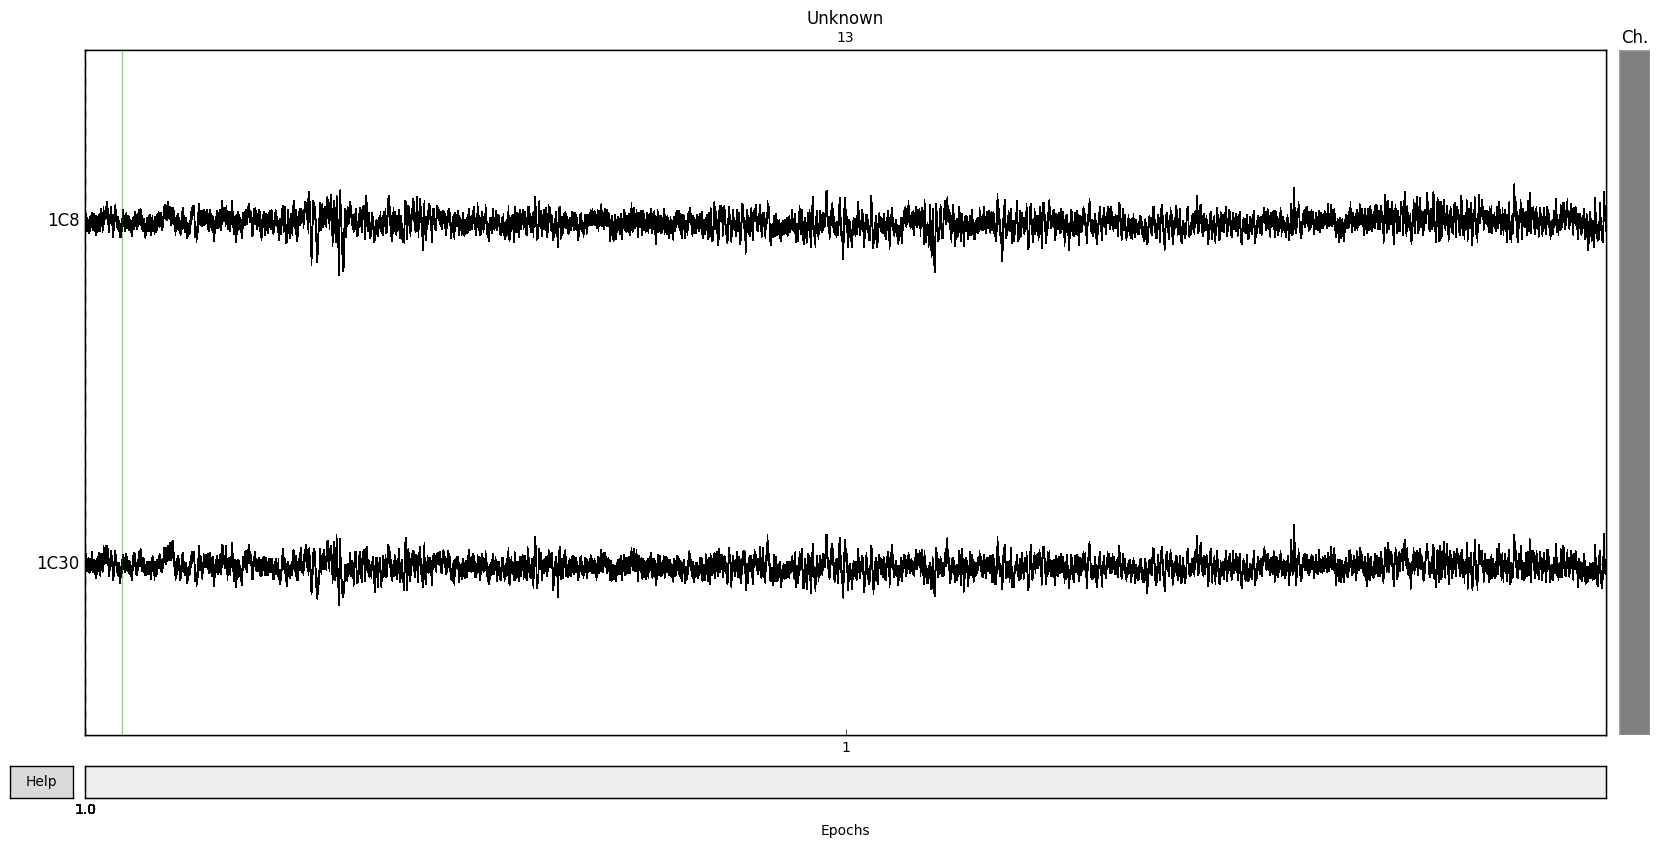

Loading data for 1 events and 10497 original time points ...
0 bad epochs dropped
Loading data for 1 events and 10497 original time points ...
Loading data for 1 events and 10497 original time points ...


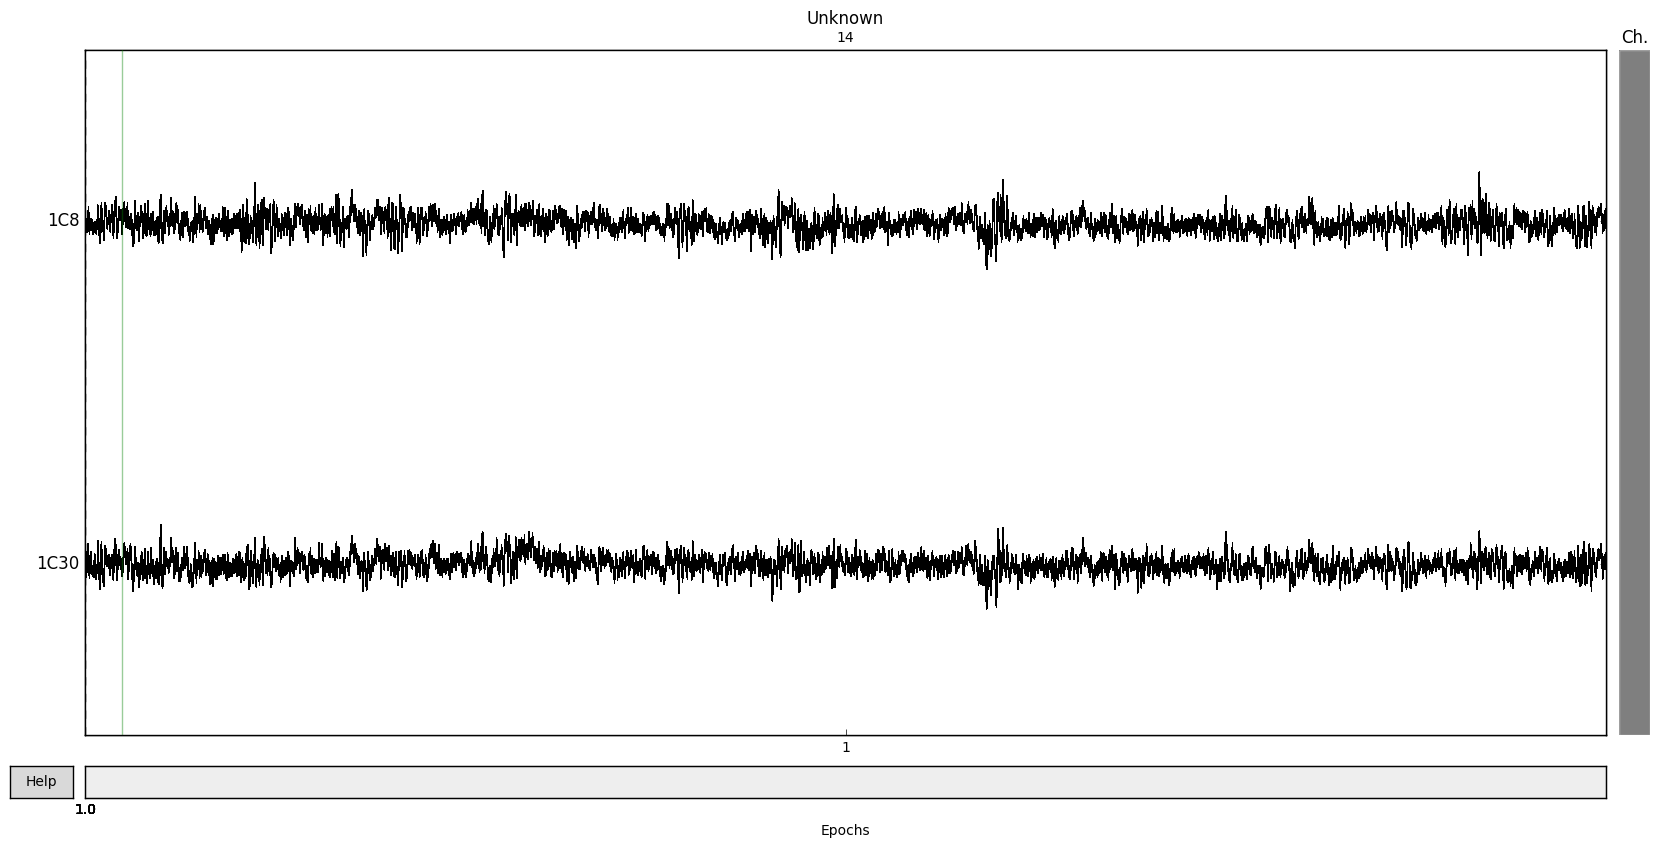

In [66]:
epochs_happy.plot(scalings = 'auto');
epochs_sad.plot(scalings = 'auto');

Loading data for 1 events and 10497 original time points ...


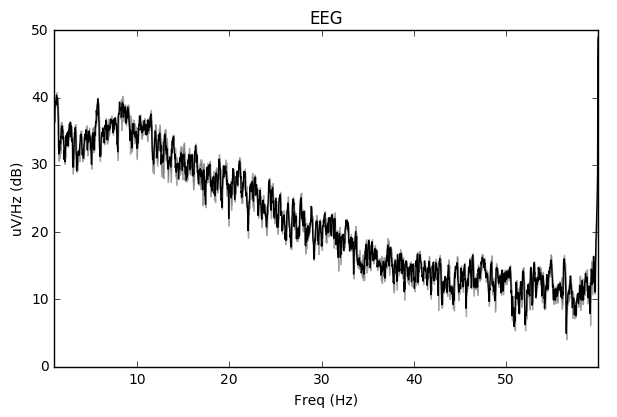

Loading data for 1 events and 10497 original time points ...


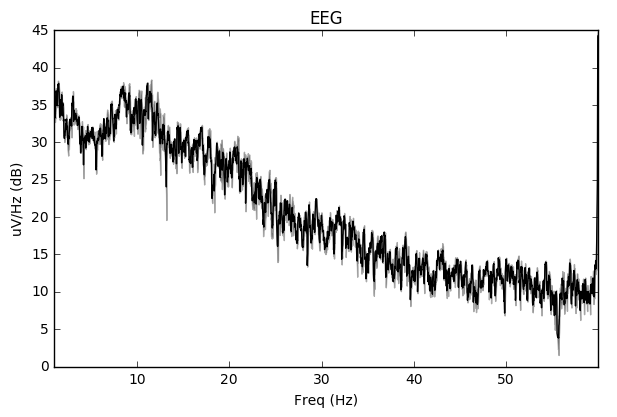

In [67]:
epochs_happy.plot_psd(fmin=1, fmax=60);
epochs_sad.plot_psd(fmin=1, fmax=60);

In [68]:
psds_h, freqs = mne.time_frequency.psd_multitaper(epochs_happy, fmin=4, fmax=8)
psds_s, freqs = mne.time_frequency.psd_multitaper(epochs_sad, fmin=4, fmax=8)

Loading data for 1 events and 10497 original time points ...
Loading data for 1 events and 10497 original time points ...


In [69]:
print('Theta power (happy) = ' + str(10*np.log10(np.mean(psds_h)/0.000000001)) + '\nTheta power (sad) = ' + str(10*np.log10(np.mean(psds_s)/0.000000001)))

Theta power (happy) = 5.19130352422
Theta power (sad) = 1.72650093603
